In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


In [7]:
# Load the dataset
df = pd.read_csv('data/raw/synthetic_debt_data.csv')

# Display the first few rows of the dataframe
print(df.head())

# Get a concise summary of the dataframe
print(df.info())

# Describe the data to get mean, median, etc.
print(df.describe())

   User_ID  Initial_Debt  Interest_Rate  Minimum_Payment_Percentage  \
0        1       4370.86           8.70                        1.89   
1        2       9556.43          15.84                        1.87   
2        3       7587.95          22.46                        2.86   
3        4       6387.93          19.64                        1.87   
4        5       2404.17          21.13                        1.91   

   Monthly_Income  Monthly_Expenses  Additional_Payment Repayment_Strategy  
0         5363.51         3915.3623              196.82          Avalanche  
1         5983.41         4906.3962              236.72          Avalanche  
2         3252.34         2601.8720              427.27   Highest Interest  
3         5124.37         2869.6472              170.00          Avalanche  
4         4858.73         2720.8888              434.82          Avalanche  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   C

In [2]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['Repayment_Strategy'] = label_encoder.fit_transform(df['Repayment_Strategy'])

# Splitting the features and target variable
X = df.drop('Repayment_Strategy', axis=1)
y = df['Repayment_Strategy']


In [3]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_validate, X_test, y_validate, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [4]:
 # Initialize and train the decision tree model
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [5]:
# Predict on the validation set
y_pred_validate = dtree.predict(X_validate)

# Calculate accuracy
validate_accuracy = accuracy_score(y_validate, y_pred_validate)
print(f"Validation Accuracy: {validate_accuracy:.2f}")

Validation Accuracy: 0.29


In [6]:
# Get feature importance
feature_importance = pd.Series(dtree.feature_importances_, index=X.columns).sort_values(ascending=False)

print("Feature Importances:\n", feature_importance)

Feature Importances:
 Initial_Debt                  0.196755
Additional_Payment            0.160288
Monthly_Expenses              0.149986
User_ID                       0.146886
Minimum_Payment_Percentage    0.136029
Monthly_Income                0.133460
Interest_Rate                 0.076595
dtype: float64


In [9]:
import matplotlib.pyplot as plt

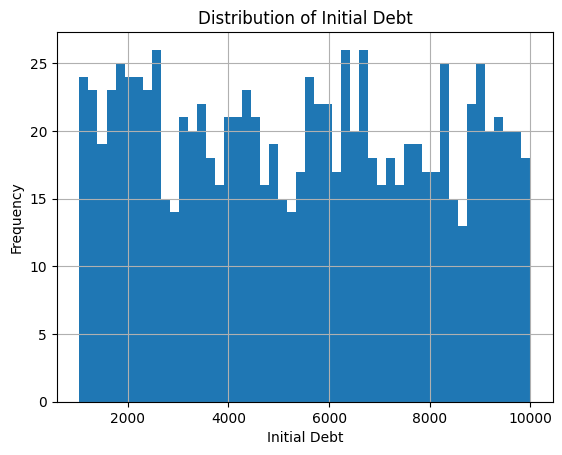

In [10]:
# Histogram of Initial_Debt
df['Initial_Debt'].hist(bins=50)
plt.title('Distribution of Initial Debt')
plt.xlabel('Initial Debt')
plt.ylabel('Frequency')
plt.show()

In [11]:
import seaborn as sns

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


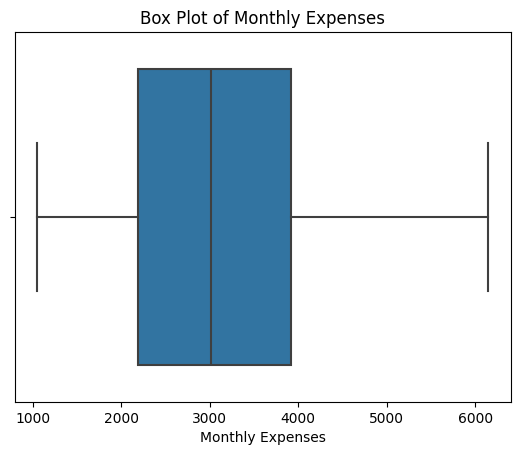

In [12]:
# Box plot of Monthly_Expenses
sns.boxplot(x=df['Monthly_Expenses'])
plt.title('Box Plot of Monthly Expenses')
plt.xlabel('Monthly Expenses')
plt.show()

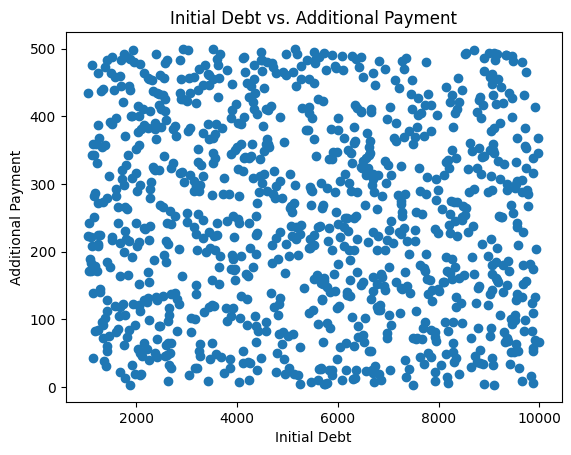

In [13]:
# Scatter plot of Initial_Debt vs. Additional_Payment
plt.scatter(df['Initial_Debt'], df['Additional_Payment'])
plt.title('Initial Debt vs. Additional Payment')
plt.xlabel('Initial Debt')
plt.ylabel('Additional Payment')
plt.show()

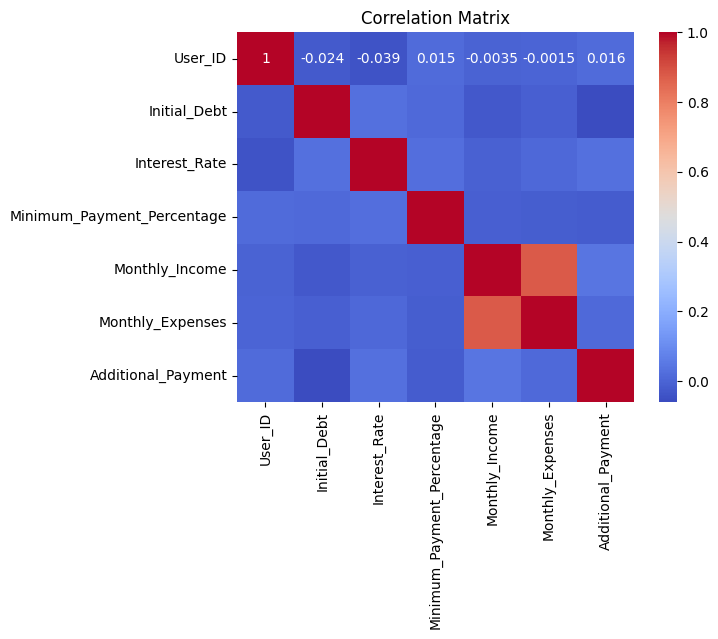

In [19]:
# Only select numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

# Plotting the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


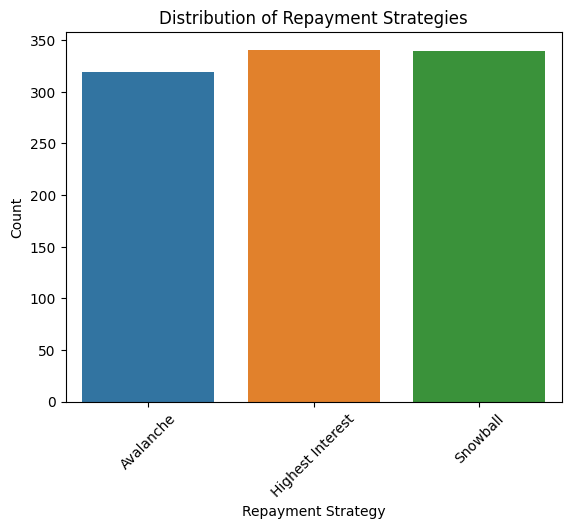

In [15]:
# Count plot of repayment strategies
sns.countplot(x='Repayment_Strategy', data=df)
plt.title('Distribution of Repayment Strategies')
plt.xlabel('Repayment Strategy')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()